In [34]:
import numpy as np
import os
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [35]:
directory = r'D:\_Projects\Tumor_Hackathon\Tumor_Hackathon\Brain Tumor Data Set'

def create_dataset():
    features = []
    labels = []
    names = ['healthy', 'tumor']

    for i in names:
        path = os.path.join(directory, i)
        label = names.index(i)

        for img in os.listdir(path):
            img_path = os.path.join(path, img)

            img_array = keras.preprocessing.image.load_img(img_path)
            img_array = img_array.resize((200,200))

            features.append(img_array)
            labels.append(label)

    return (np.array(features), np.array(labels))


In [36]:
x, y = create_dataset()

In [37]:
print(x.shape)
print(y.shape)

(4594, 200, 200, 3)
(4594,)


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=42)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3215, 200, 200, 3)
(1379, 200, 200, 3)
(3215,)
(1379,)


In [40]:
x_train = x_train/255
x_test = x_test/255

In [41]:
model = keras.models.Sequential()
input_shape = (200,200,3)

x = model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = input_shape))
x = model.add(keras.layers.MaxPool2D())
x = model.add(keras.layers.Conv2D(16, (3,3), activation='relu'))
x = model.add(keras.layers.MaxPool2D())

x = model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
x = model.add(keras.layers.MaxPool2D())
x = model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
x = model.add(keras.layers.MaxPool2D())

x = model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
x = model.add(keras.layers.MaxPool2D())
x = model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
x = model.add(keras.layers.MaxPool2D())

x = model.add(keras.layers.Dropout(0.2))

x = model.add(keras.layers.Flatten())

x = model.add(keras.layers.Dropout(0.1))

x = model.add(keras.layers.Dense(512, activation='relu'))
x = model.add(keras.layers.Dense(64, activation='relu'))
x = model.add(keras.layers.Dense(4, activation='relu'))

x = model.add(keras.layers.Dropout(0.1))

x = model.add(keras.layers.Dense(1, activation='sigmoid'))


c:\python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [42]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 97, 97, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 46, 46, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 21, 21, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 2, 2, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,457 (540.85 KB)

 Trainable params: 138,457 (540.85 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(loss= keras.losses.BinaryCrossentropy(), metrics=['accuracy'], optimizer='adam')
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model_history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, callbacks=callback)

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.5513 - loss: 0.6902 - val_accuracy: 0.5537 - val_loss: 0.6523
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.5755 - loss: 0.6591 - val_accuracy: 0.7916 - val_loss: 0.5197
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.7630 - loss: 0.5016 - val_accuracy: 0.8351 - val_loss: 0.4109
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.7921 - loss: 0.4592 - val_accuracy: 0.8725 - val_loss: 0.3124
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.8643 - loss: 0.3122 - val_accuracy: 0.8958 - val_loss: 0.2359
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.9145 - loss: 0.2528 - val_accuracy: 0.9160 - val_loss: 0.1954
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9153 - loss: 0.2182 - val_accuracy: 0.9487 - val_loss: 0.1476
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9343 - loss: 0.1748 - val_accuracy: 0.9425 - v

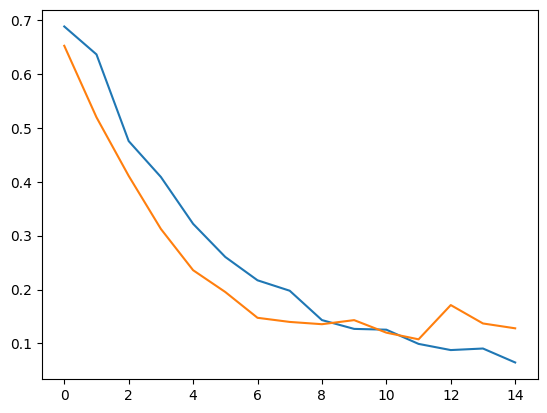

In [44]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.show()

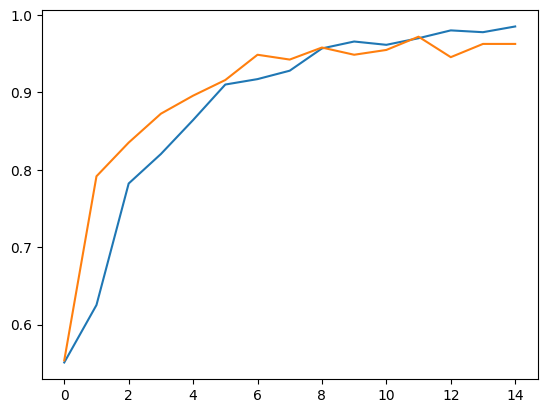

In [45]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.show()

In [48]:
y_pred = model.predict(x_test)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [51]:
model.evaluate(x_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9409 - loss: 0.2442


[0.26069486141204834, 0.9383611083030701]

In [59]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

[[595  55]
 [ 30 699]]


<function matplotlib.pyplot.show(close=None, block=None)>

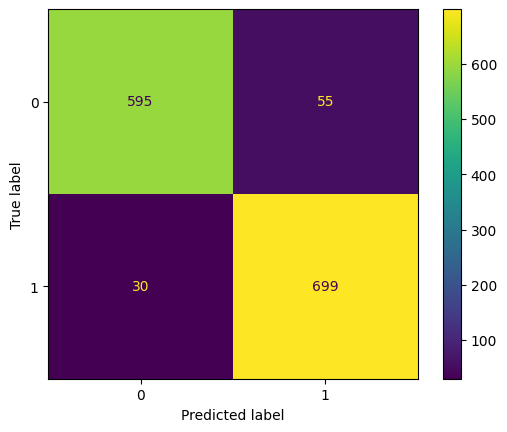

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf_mat = confusion_matrix(y_test, y_pred, labels=[0,1])
print(cf_mat)

disp = ConfusionMatrixDisplay(cf_mat)
disp.plot()
plt.show

In [46]:
model.save('final_model.h5')